In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set_style('whitegrid')

##### Categories
1. Categorical Plots (hue can be used | comparison with categorical)
    a. countplot (single param)
    b. barplot (one categorical, one numerical | calculates mean by default)
    c. boxplot
    d. violinplot
    e. swarmplot
2. Distribution Plots
    a. distplot
    b. displot
    c. jointplot
    d. pairplot
    e. kdeplot
    f. rugplot
    g. scatterplot
3. Matrix Plots
    a. heatmap
    b. clustermap
    c. pairplot (same as above one)
4. Regression Plot
    a. lmplot
    b. regplot
5. Grid Plots
    a. PairGrid
    b. JointGrid
    c. FacetGrid

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

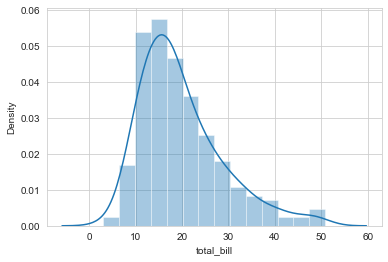

In [9]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(tips['total_bill'])

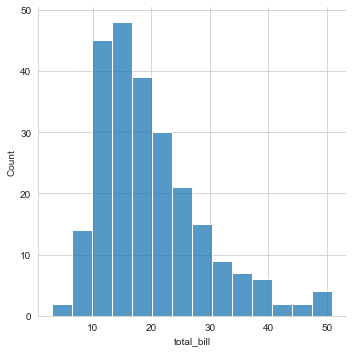

In [10]:
sns.displot(data=tips, x='total_bill')

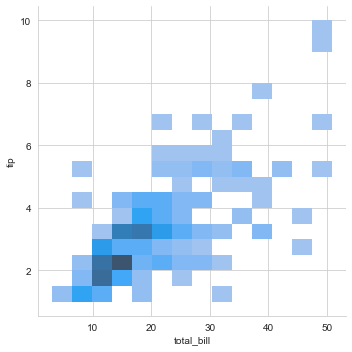

In [11]:
sns.displot(data=tips, x='total_bill', y='tip')

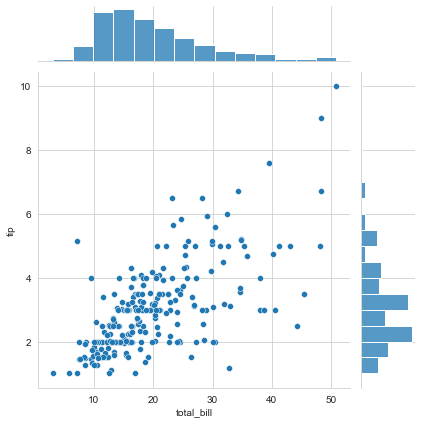

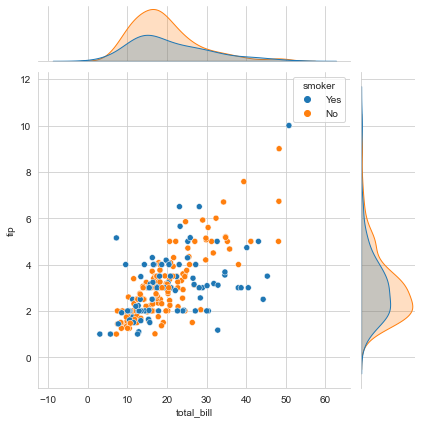

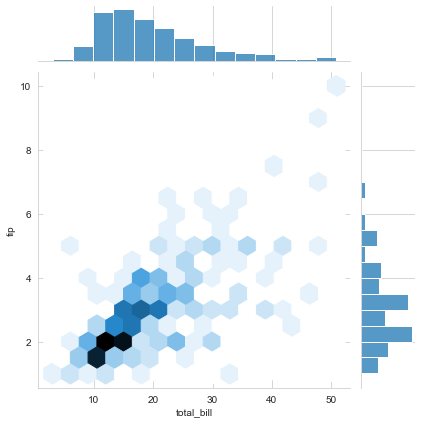

In [16]:
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()
sns.jointplot(data=tips, x='total_bill', y='tip',hue='smoker')
plt.show()
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.show()

sns.scatterplot(data=tips, x='total_bill',y='tip')
plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

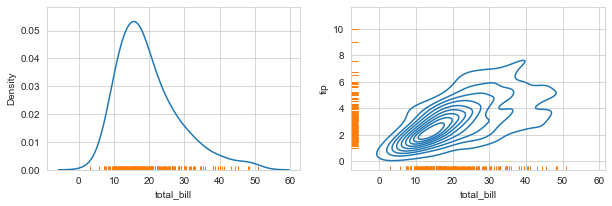

In [22]:
fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.kdeplot(data=tips, x='total_bill')
sns.rugplot(data=tips, x='total_bill')
plt.subplot(1,2,2)
sns.kdeplot(data=tips, x='total_bill',y='tip')
sns.rugplot(data=tips, x='total_bill',y='tip')

In [24]:
flight = sns.load_dataset('flights')

In [27]:
flight.describe(include='all')

,year,month,passengers
count,144.000000,144,144.000000
unique,NaN,12,NaN
top,NaN,Jan,NaN
freq,NaN,12,NaN
mean,1954.500000,NaN,280.298611
std,3.464102,NaN,119.966317
min,1949.000000,NaN,104.000000
25%,1951.750000,NaN,180.000000
50%,1954.500000,NaN,265.500000
75%,1957.250000,NaN,360.500000


In [32]:
fdf = flight.pivot_table(index='year',columns='month',values='passengers')
fdf

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='month', ylabel='year'>

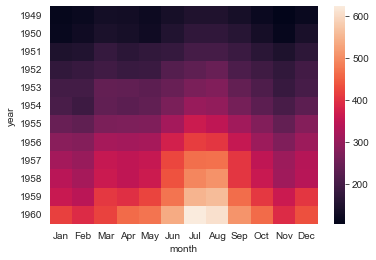

In [33]:
sns.heatmap(data = fdf)

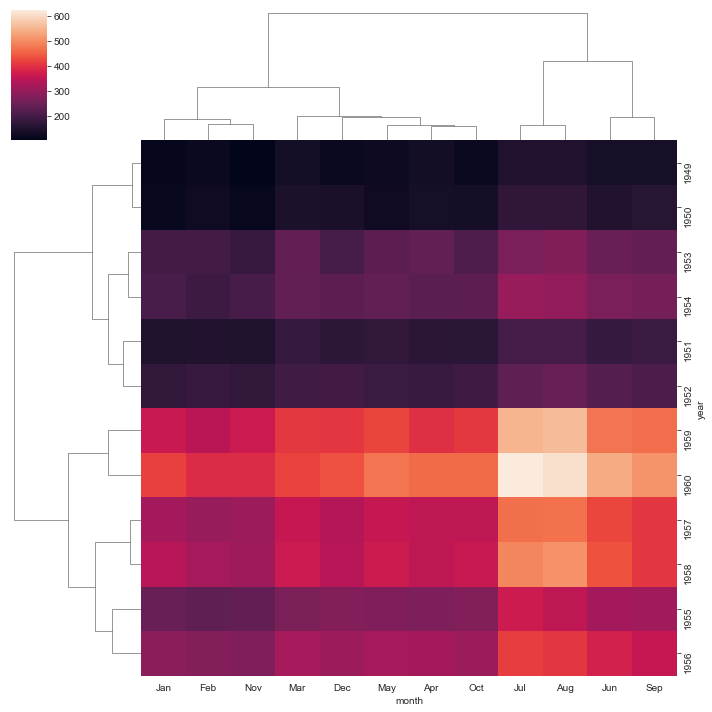

In [38]:
sns.clustermap(data=fdf)

In [39]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [40]:
iris = sns.load_dataset('iris')

In [41]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


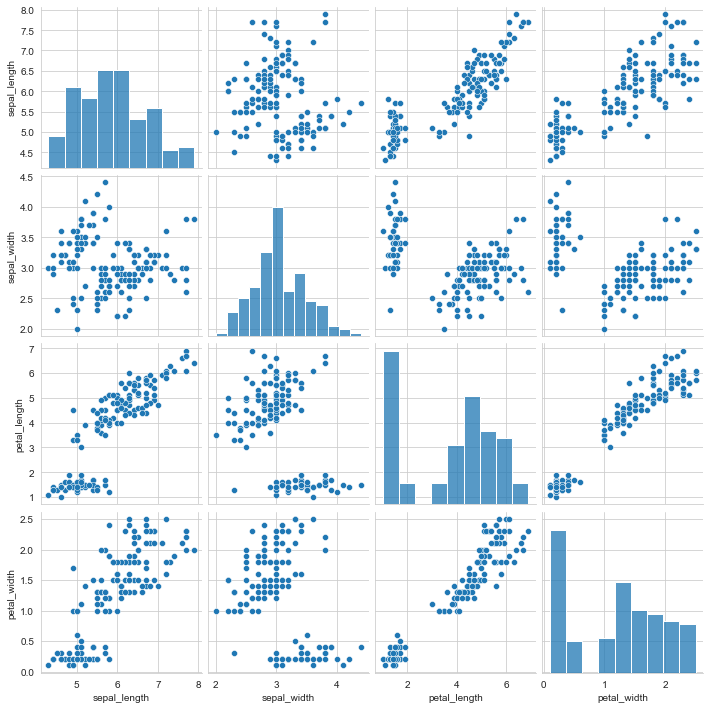

In [42]:
sns.pairplot(data=iris)

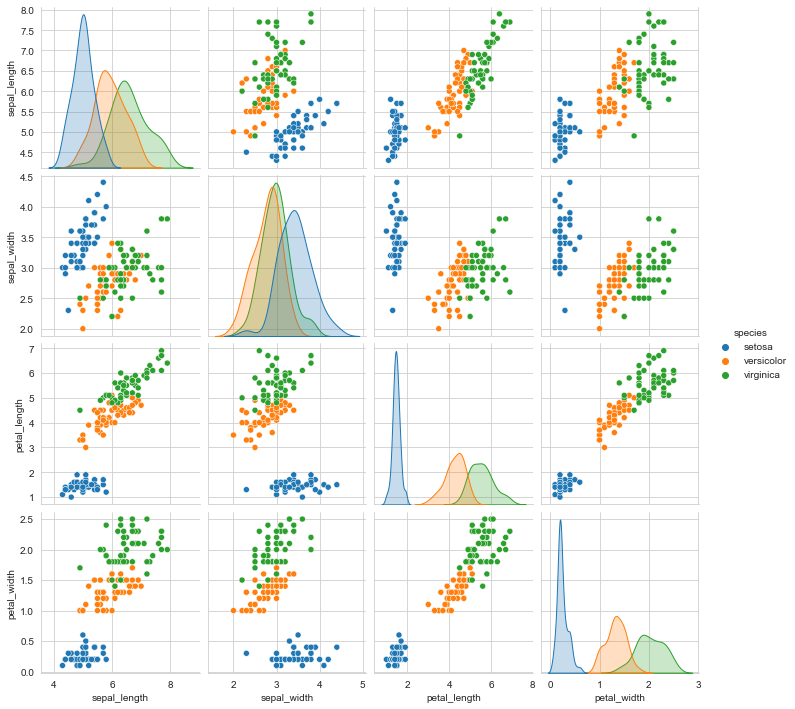

In [43]:
sns.pairplot(data=iris, hue = 'species')

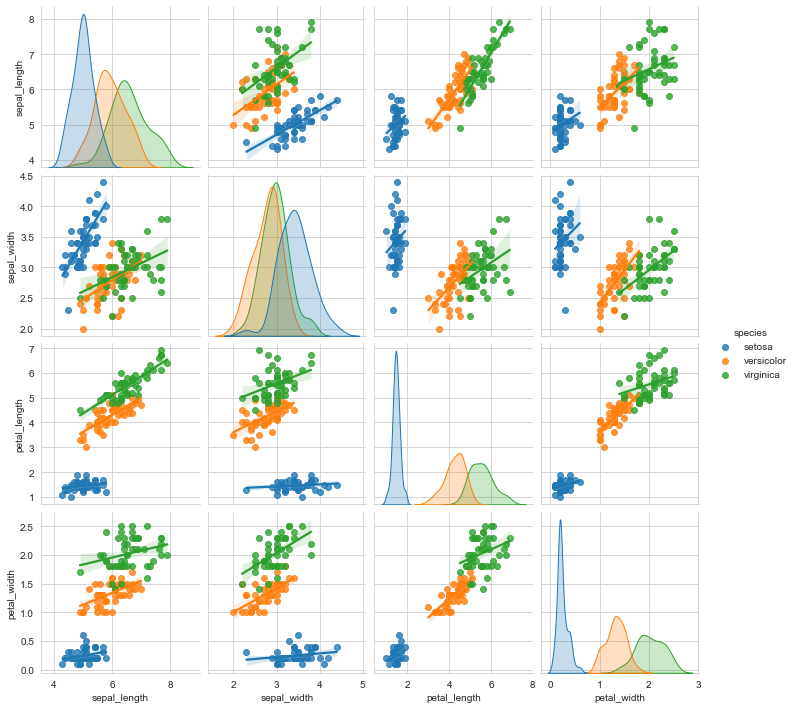

In [45]:
sns.pairplot(data=iris, hue = 'species', kind='reg')

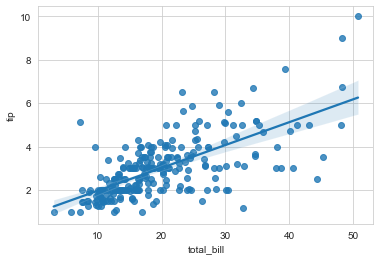

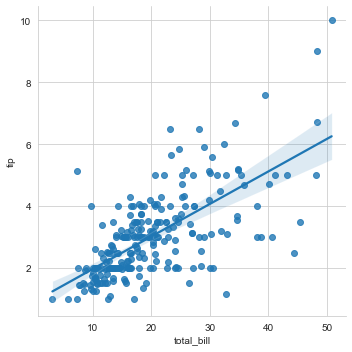

In [46]:
sns.regplot(data=tips, x='total_bill', y='tip')
plt.show()
sns.lmplot(data=tips, x='total_bill', y='tip')

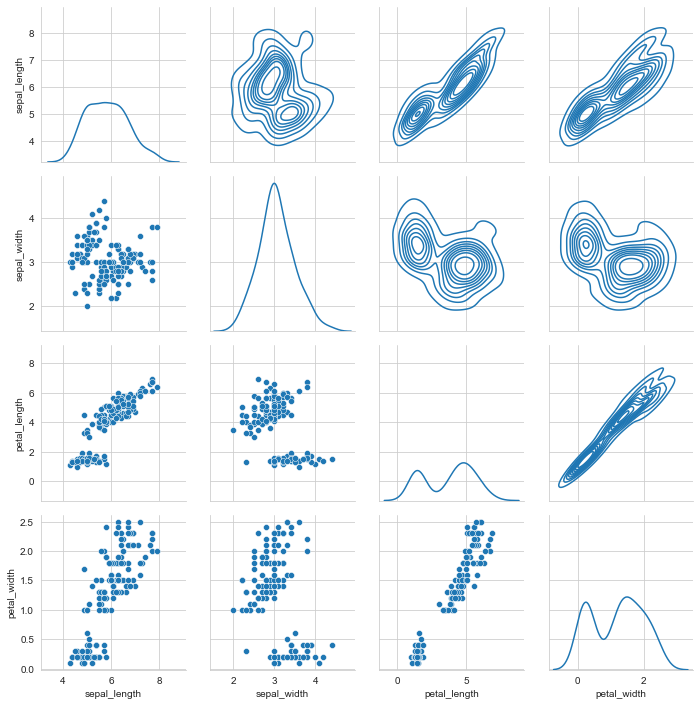

In [49]:
pg = sns.PairGrid(data = iris)
pg.map_diag(sns.kdeplot)
pg.map_lower(sns.scatterplot)
pg.map_upper(sns.kdeplot)

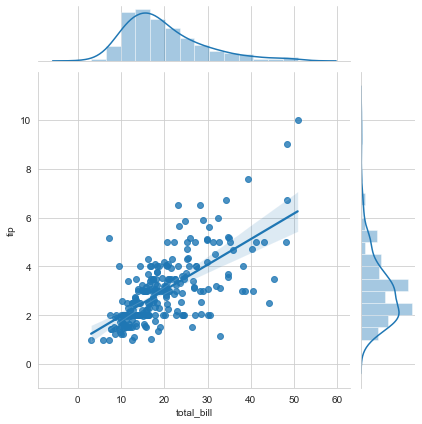

In [51]:
jg = sns.JointGrid(data=tips, x='total_bill',y='tip')
jg.plot(sns.regplot, sns.distplot)

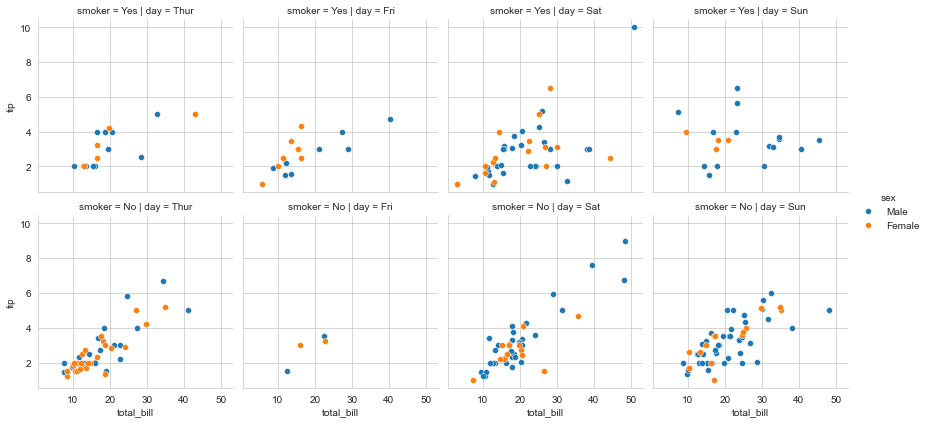

In [53]:
fg = sns.FacetGrid(data= tips, row='smoker', col='day', hue='sex')
fg.map(sns.scatterplot, 'total_bill','tip').add_legend()